# House Price Prediction

## Problem Statement: 

The goal of this project is to build a system that predicts house prices based on property features such as size, number of rooms and amenities like a chimeney, garden or garage. Using a dataset of properties, we aim to develop an artificial inteligence model that can estimate house prices accurately. This model will help real estate agents, buyers, and sellers make better decisions by automating property valuation in real time.

### 1: Importing libraries and Exploring the Dataset.

### 2: Definining Exploratory Data Analysis with an overview of the whole project .

### 3: Create a model that fits the data


### 

In [1]:
# Importante Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
import joblib
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read The Dataset
data = pd.read_csv('houses_balears.csv')
data.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
0,"Vendemos este precioso piso tipo duplex, estil...",Anuncio actualizado el 4 de abril,1,0,2,1,0,segunda mano/buen estado,NaN,en trámite,...,NaN,2019-04-08,sur,550000,0,2,0,1,1,NaN
1,"Piso en pleno centro de Santa Eulália, en buen...",más de 5 meses sin actualizar,1,0,1,1,0,segunda mano/buen estado,NaN,NaN,...,47,2019-04-08,norte,240000,0,1,0,0,0,NaN
2,Precioso piso en planta cuarta de un edificio ...,más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,NaN,no indicado,...,NaN,2019-04-08,NaN,775000,0,3,0,0,1,NaN
3,Completamente renovado por 1 año como arquitec...,más de 5 meses sin actualizar,0,0,1,1,0,segunda mano/buen estado,NaN,NaN,...,60,2019-04-08,NaN,300000,0,2,0,0,1,NaN
4,"En primera línea de mar, Dúplex de 144 m2, con...",más de 5 meses sin actualizar,1,1,2,1,0,segunda mano/buen estado,NaN,en trámite,...,144,2019-04-08,NaN,485000,0,3,0,1,1,NaN


In [4]:
print('Column Names :\n', data.columns)

Column Names :
 Index(['ad_description', 'ad_last_update', 'air_conditioner', 'balcony',
       'bath_num', 'built_in_wardrobe', 'chimney', 'condition',
       'construct_date', 'energetic_certif', 'floor', 'garage', 'garden',
       'ground_size', 'heating', 'house_id', 'house_type', 'kitchen', 'lift',
       'loc_city', 'loc_district', 'loc_full', 'loc_neigh', 'loc_street',
       'loc_zone', 'm2_real', 'm2_useful', 'obtention_date', 'orientation',
       'price', 'reduced_mobility', 'room_num', 'storage_room',
       'swimming_pool', 'terrace', 'unfurnished'],
      dtype='object')


In [5]:
print(f"dimension of the dataframe : {data.ndim}")

dimension of the dataframe : 2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24880 entries, 0 to 24879
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ad_description     24356 non-null  object
 1   ad_last_update     24880 non-null  object
 2   air_conditioner    24880 non-null  object
 3   balcony            24880 non-null  object
 4   bath_num           24880 non-null  object
 5   built_in_wardrobe  24880 non-null  object
 6   chimney            24880 non-null  object
 7   condition          18204 non-null  object
 8   construct_date     10314 non-null  object
 9   energetic_certif   18860 non-null  object
 10  floor              16615 non-null  object
 11  garage             11087 non-null  object
 12  garden             24880 non-null  object
 13  ground_size        58 non-null     object
 14  heating            6349 non-null   object
 15  house_id           24880 non-null  object
 16  house_type         24880 non-null  objec

In [7]:
print(f"number of rows : {data.shape[0]}")

number of rows : 24880


In [8]:
print(f"number of columns :{data.shape[1]}")

number of columns :36


- Here we will show some statistics about numerical attributes (columns) using describe()

In [9]:
data.describe()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
count,24356,24880,24880,24880,24880,24880,24880,18204,10314,18860,...,11704,24880,10879,24880,24880,24880,24880,24880,24880,58
unique,23872,363,3,3,23,3,3,4,185,4,...,655,3,16,2078,3,28,3,3,3,1
top,ad_description,Anuncio actualizado el 8 de abril,1,0,2,0,0,segunda mano/buen estado,1900,en trámite,...,100,2019-04-09,sur,450000,0,3,0,0,1,unfurnished
freq,58,1224,13128,18905,10155,12455,23048,15960,444,12710,...,398,15397,4976,374,23469,8499,15370,14585,16210,58


Choose the colums that we are going to use.

In [10]:
columnas_deseadas = [
    'air_conditioner', 'balcony', 'bath_num', 'chimney', 
     'garage', 'garden', 'house_type', 'lift',
    'loc_city', 'm2_real', 'price', 'reduced_mobility', 
    'room_num', 'storage_room', 'swimming_pool', 'terrace','loc_zone'
]

data = data[columnas_deseadas]

In [11]:
data.head()

,air_conditioner,balcony,bath_num,chimney,garage,garden,house_type,lift,loc_city,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,loc_zone
0,1,0,2,0,plaza de garaje incluida en el precio,1,Dúplex,1,Santa Eulalia del Río,150,550000,0,2,0,1,1,"Ibiza, Balears (Illes)"
1,1,0,1,0,NaN,0,Piso,1,Santa Eulalia del Río,55,240000,0,1,0,0,0,"Ibiza, Balears (Illes)"
2,0,0,2,0,NaN,0,Piso,1,Santa Eulalia del Río,130,775000,0,3,0,0,1,"Ibiza, Balears (Illes)"
3,0,0,1,0,plaza de garaje incluida en el precio,1,Piso,0,Santa Eulalia del Río,70,300000,0,2,0,0,1,"Ibiza, Balears (Illes)"
4,1,1,2,0,plaza de garaje incluida en el precio,1,Dúplex,1,Santa Eulalia del Río,150,485000,0,3,0,1,1,"Ibiza, Balears (Illes)"


In [12]:
data.isna().sum()


air_conditioner         0
balcony                 0
bath_num                0
chimney                 0
garage              13793
garden                  0
house_type              0
lift                14720
loc_city                0
m2_real                 0
price                   0
reduced_mobility        0
room_num                0
storage_room            0
swimming_pool           0
terrace                 0
loc_zone                0
dtype: int64

In [13]:
data.head()

,air_conditioner,balcony,bath_num,chimney,garage,garden,house_type,lift,loc_city,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,loc_zone
0,1,0,2,0,plaza de garaje incluida en el precio,1,Dúplex,1,Santa Eulalia del Río,150,550000,0,2,0,1,1,"Ibiza, Balears (Illes)"
1,1,0,1,0,NaN,0,Piso,1,Santa Eulalia del Río,55,240000,0,1,0,0,0,"Ibiza, Balears (Illes)"
2,0,0,2,0,NaN,0,Piso,1,Santa Eulalia del Río,130,775000,0,3,0,0,1,"Ibiza, Balears (Illes)"
3,0,0,1,0,plaza de garaje incluida en el precio,1,Piso,0,Santa Eulalia del Río,70,300000,0,2,0,0,1,"Ibiza, Balears (Illes)"
4,1,1,2,0,plaza de garaje incluida en el precio,1,Dúplex,1,Santa Eulalia del Río,150,485000,0,3,0,1,1,"Ibiza, Balears (Illes)"


In [14]:
cols_a_convertir = [
    'air_conditioner', 'balcony', 'bath_num', 'chimney', 
     'garage', 'garden', 'm2_real', 'price', 'reduced_mobility', 
    'room_num', 'storage_room', 'swimming_pool', 'terrace']
for col in cols_a_convertir:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [15]:
data = data[data['house_type'] != "house_type"]

In [16]:
data.corr(numeric_only=True)

,air_conditioner,balcony,bath_num,chimney,garage,garden,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace
air_conditioner,1.000000,0.174752,0.148219,-0.068689,NaN,0.208274,-0.062529,0.114148,0.087250,-0.009160,0.212412,0.295572,0.263280
balcony,0.174752,1.000000,0.038717,-0.031888,NaN,0.059105,-0.035569,0.012785,0.116398,0.028433,0.171711,0.029911,0.124128
bath_num,0.148219,0.038717,1.000000,0.068589,NaN,0.249163,0.101303,0.610954,-0.006420,0.736424,0.183975,0.316203,0.121239
chimney,-0.068689,-0.031888,0.068589,1.000000,NaN,0.189325,0.137709,0.069982,-0.021147,0.117167,0.148948,0.069375,0.099711
garage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garden,0.208274,0.059105,0.249163,0.189325,NaN,1.000000,0.033404,0.202068,0.023830,0.177281,0.306728,0.524937,0.321052
m2_real,-0.062529,-0.035569,0.101303,0.137709,NaN,0.033404,1.000000,0.208844,-0.016950,0.142805,0.015846,0.008436,-0.030561
price,0.114148,0.012785,0.610954,0.069982,NaN,0.202068,0.208844,1.000000,-0.018223,0.468332,0.120901,0.270607,0.085806
reduced_mobility,0.087250,0.116398,-0.006420,-0.021147,NaN,0.023830,-0.016950,-0.018223,1.000000,-0.021748,0.061686,0.040015,0.078823
room_num,-0.009160,0.028433,0.736424,0.117167,NaN,0.177281,0.142805,0.468332,-0.021748,1.000000,0.188887,0.149090,0.067630


- pairplot will plot pairwise relationships across an entire dataframe .

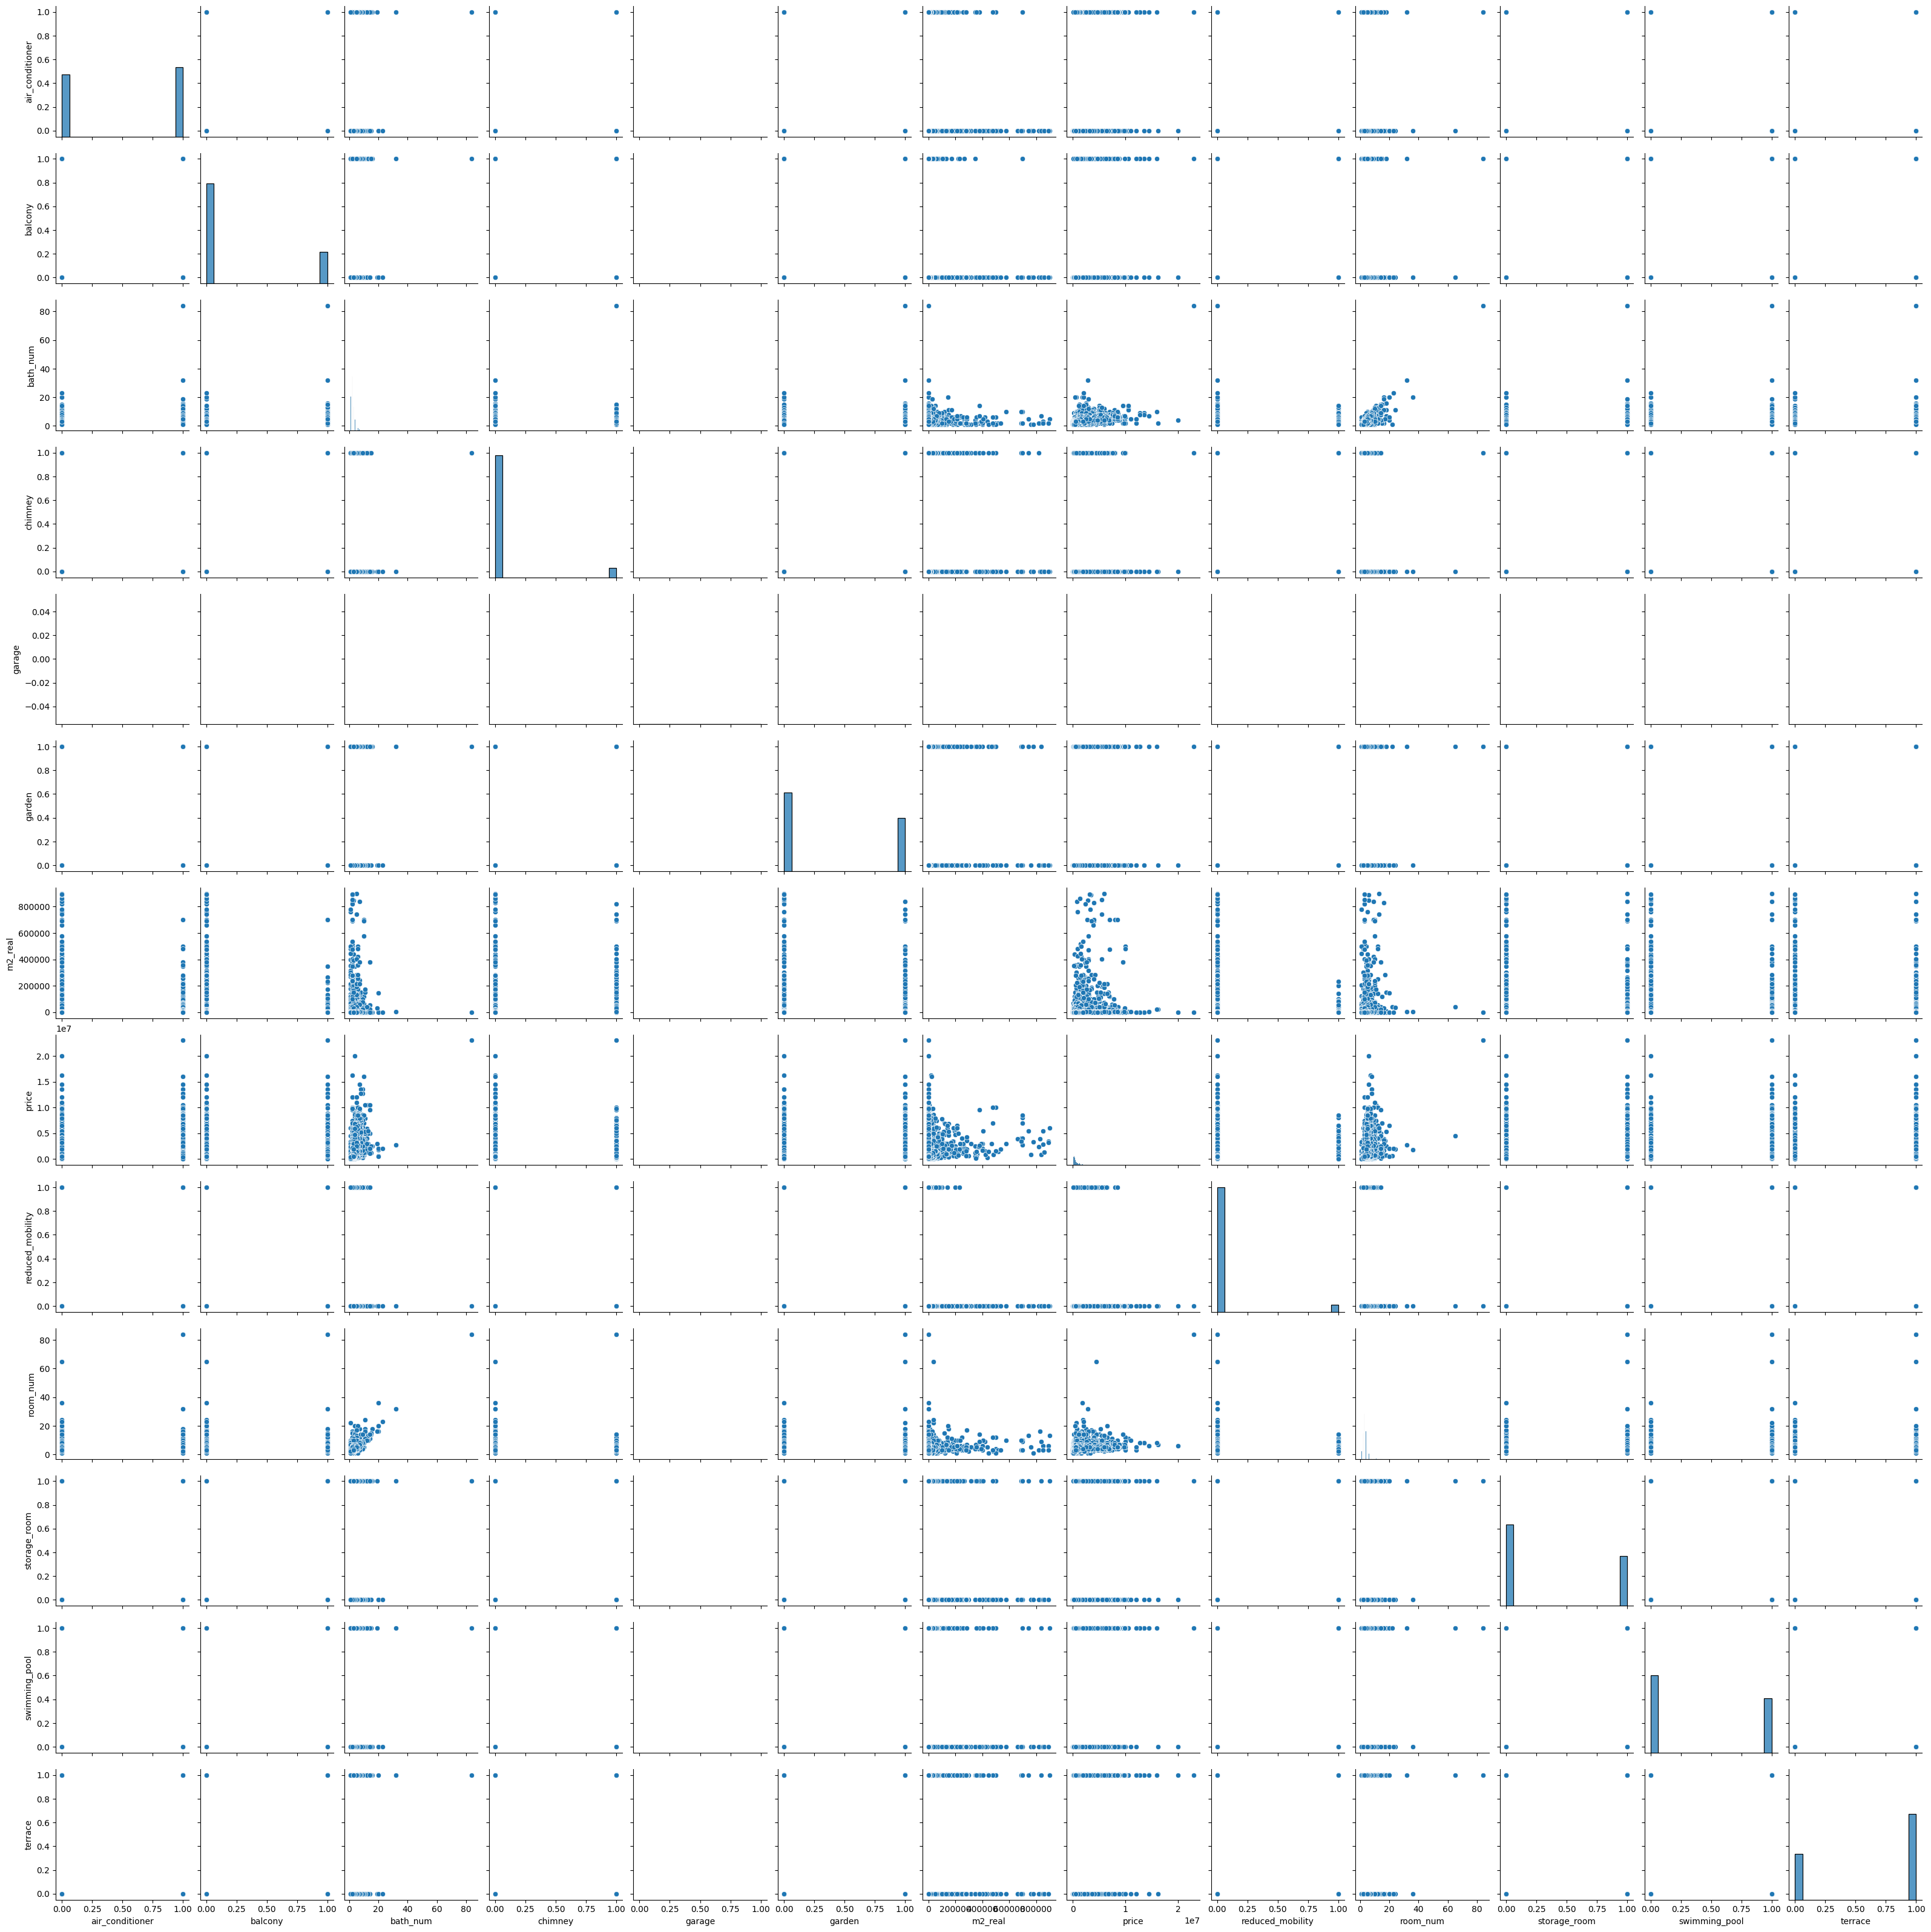

In [17]:
data_numerica = data.select_dtypes(include='number')
sns.pairplot(data_numerica)

#### Data Visualization using piechart and countplot for categorical attributes (columns).

In [18]:
data['price'].describe()


count    2.482200e+04
mean     7.594706e+05
std      1.016877e+06
min      1.000000e+00
25%      2.470000e+05
50%      4.250000e+05
75%      8.400000e+05
max      2.300000e+07
Name: price, dtype: float64

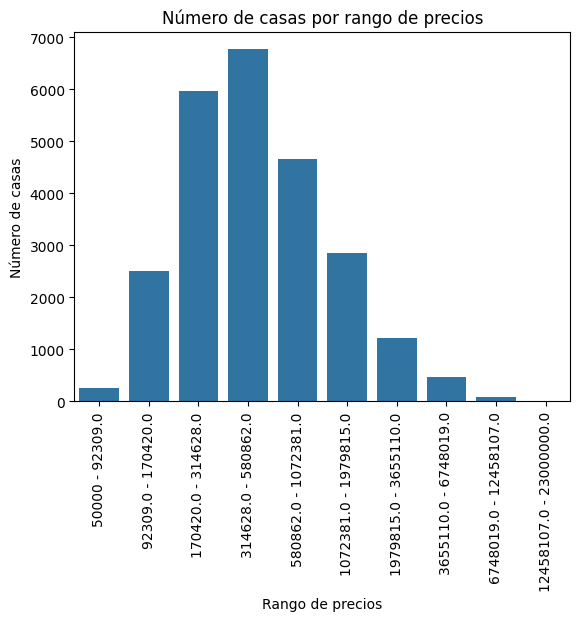

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las estadísticas descriptivas
desc_stats = data['price'].describe()

# Establecer el valor mínimo en 50,000
min_price = 50000

# Usar una escala logarítmica para crear los bins, empezando desde 50,000
log_min = np.log10(min_price)
log_max = np.log10(desc_stats['max'])

# Crear los 10 intervalos logarítmicos comenzando desde 50,000
bins = [10**(log_min + (i * (log_max - log_min) / 10)) for i in range(11)]

# Asegurarse de que el primer bin sea 50,000
bins[0] = min_price

# Crear etiquetas para los rangos
labels = [f'{round(bins[i], 0)} - {round(bins[i+1], 0)}' for i in range(len(bins)-1)]

# Crear una nueva columna con los rangos de precios
data['price_range'] = pd.cut(data['price'], bins=bins, labels=labels, include_lowest=True, right=False)

# Crear el barplot
sns.barplot(x=data['price_range'].value_counts().index, y=data['price_range'].value_counts().values)
plt.xlabel('Rango de precios')
plt.ylabel('Número de casas')
plt.title('Número de casas por rango de precios')
plt.xticks(rotation=90)
plt.show()





In [20]:
data.groupby('loc_zone').size()

loc_zone
Balears (Illes)                100
Ibiza, Balears (Illes)        3422
Mallorca, Balears (Illes)    19649
Menorca, Balears (Illes)      1651
dtype: int64

<Axes: title={'center': 'Location city'}>

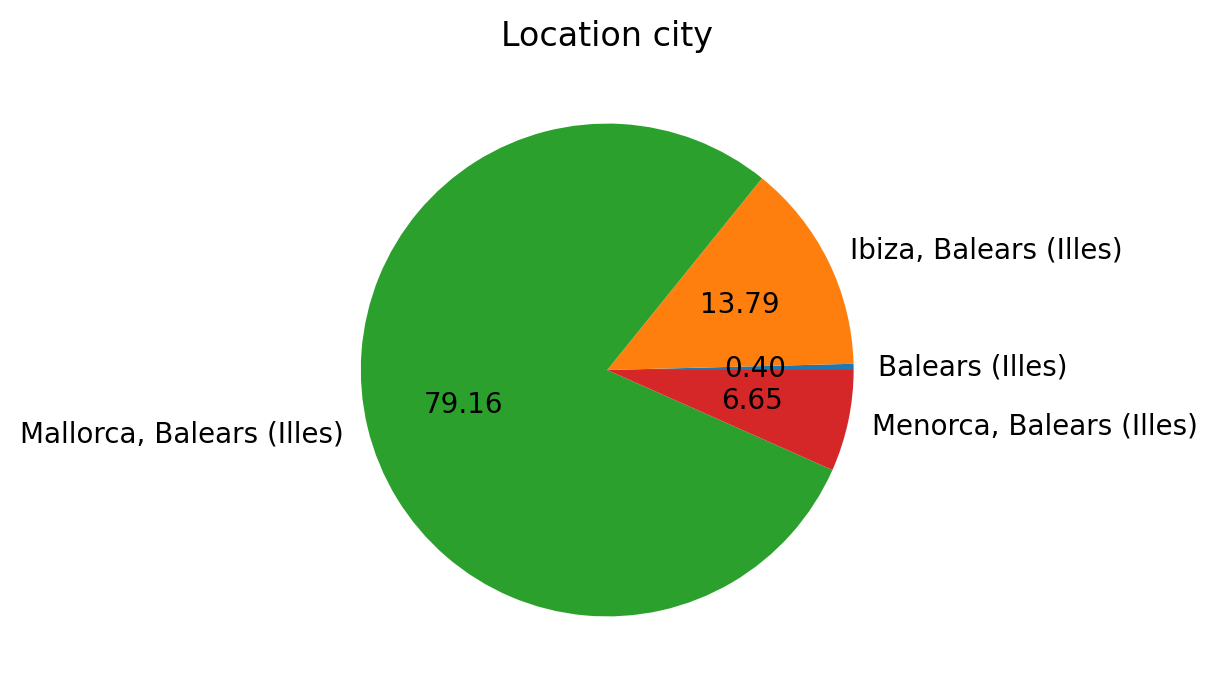

In [21]:
# pie chart of selfemployed 
plt.figure(figsize=(8,4),dpi=200)
data.groupby('loc_zone').size().plot(kind='pie', autopct='%.2f', title="Location city")

In [22]:
data.groupby('air_conditioner').size()

air_conditioner
0.0    11694
1.0    13128
dtype: int64

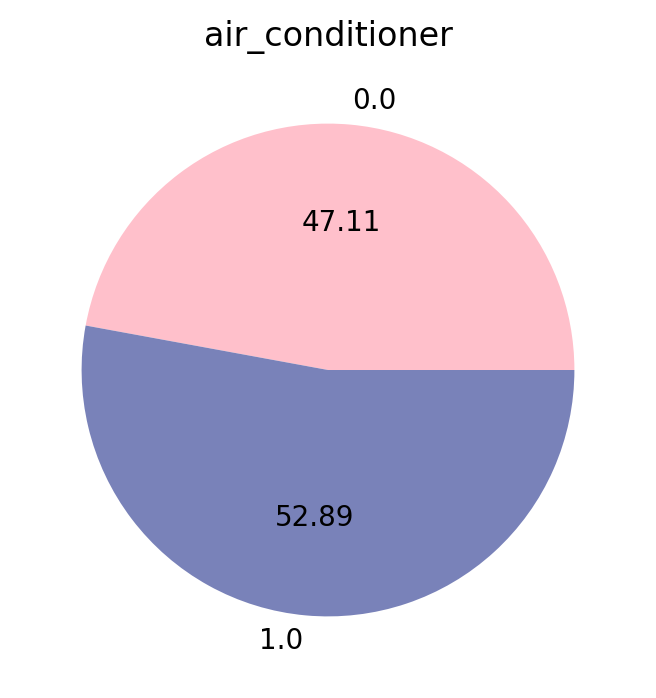

In [23]:
# pie chart of gender 
plt.figure(figsize=(10,4),dpi=200)
data.groupby('air_conditioner').size().plot(kind='pie', autopct='%.2f', colors=['pink', '#7982B9'], title="air_conditioner");

In [24]:
data.groupby('balcony').size()

balcony
0.0    18905
1.0     5917
dtype: int64

<Axes: title={'center': 'balcony'}>

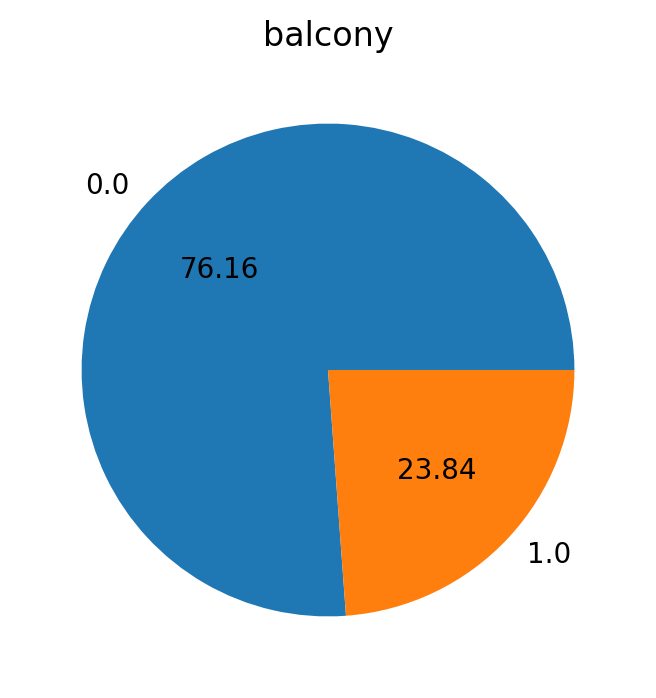

In [25]:
plt.figure(figsize=(10,4),dpi=200)
data.groupby('balcony').size().plot(kind='pie', autopct='%.2f' , title="balcony")

In [26]:
data.groupby('chimney').size()

chimney
0.0    23048
1.0     1774
dtype: int64

<Axes: title={'center': 'chimney'}>

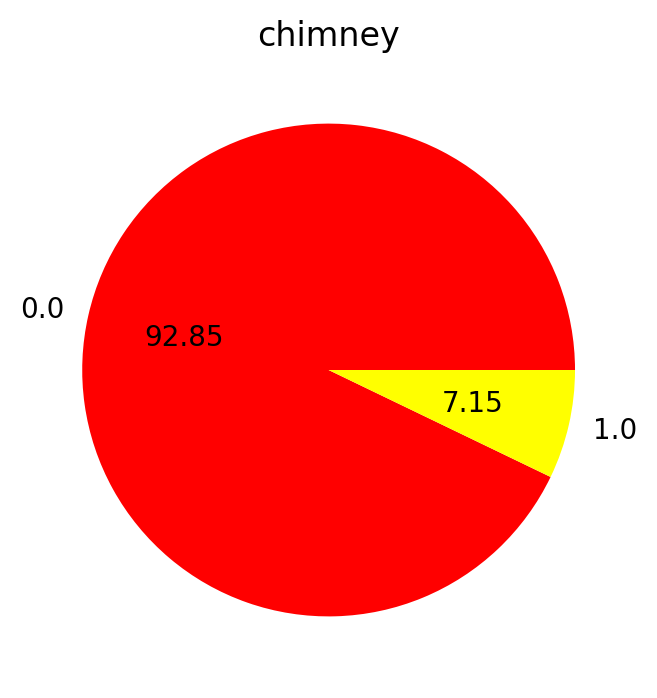

In [27]:
plt.figure(figsize=(10,4),dpi=200)
data.groupby('chimney').size().plot(kind='pie', autopct='%.2f', colors=['red', 'yellow'], title="chimney")

In [28]:
data.groupby('garage').size()

Series([], dtype: int64)

<Axes: title={'center': 'garage'}>

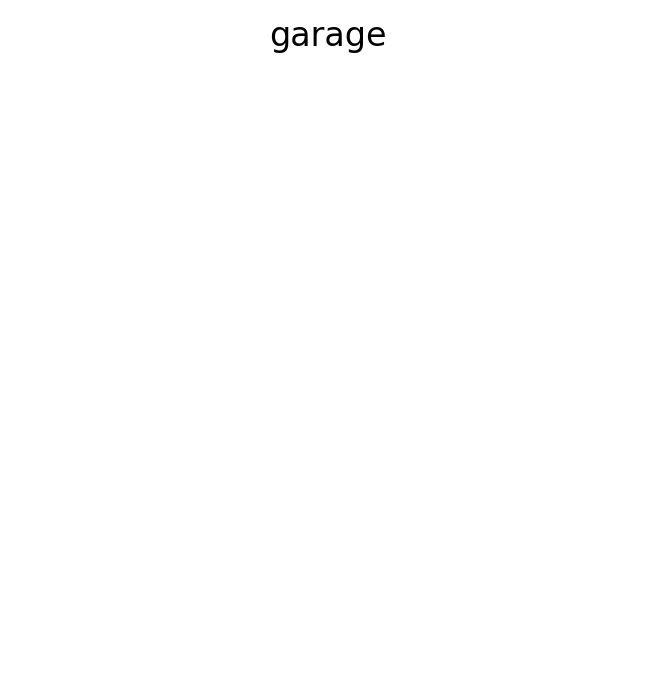

In [29]:
plt.figure(figsize=(10,4),dpi=200)
data.groupby('garage').size().plot(kind='pie', autopct='%.2f', colors=['red', 'yellow'], title="garage")

In [30]:
data.groupby('garden').size()

garden
0.0    14803
1.0    10019
dtype: int64

<Axes: title={'center': 'garden'}>

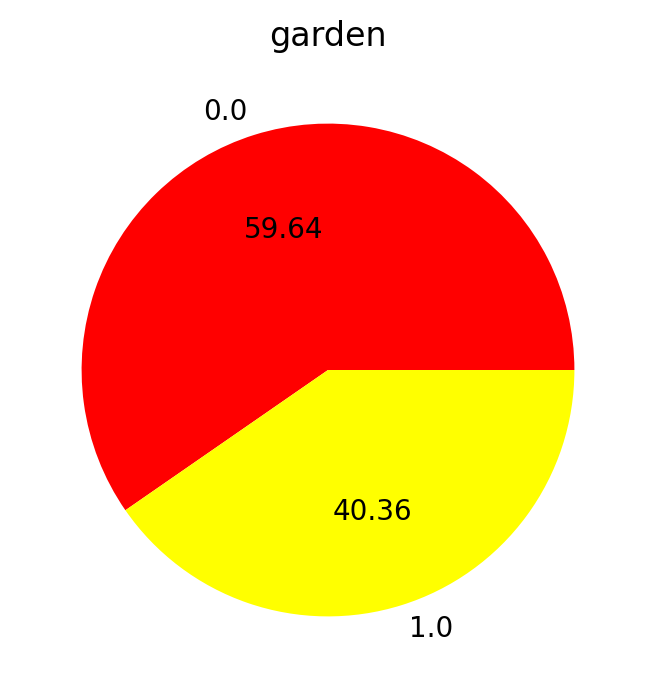

In [31]:
plt.figure(figsize=(10,4),dpi=200)
data.groupby('garden').size().plot(kind='pie', autopct='%.2f', colors=['red', 'yellow'], title="garden")

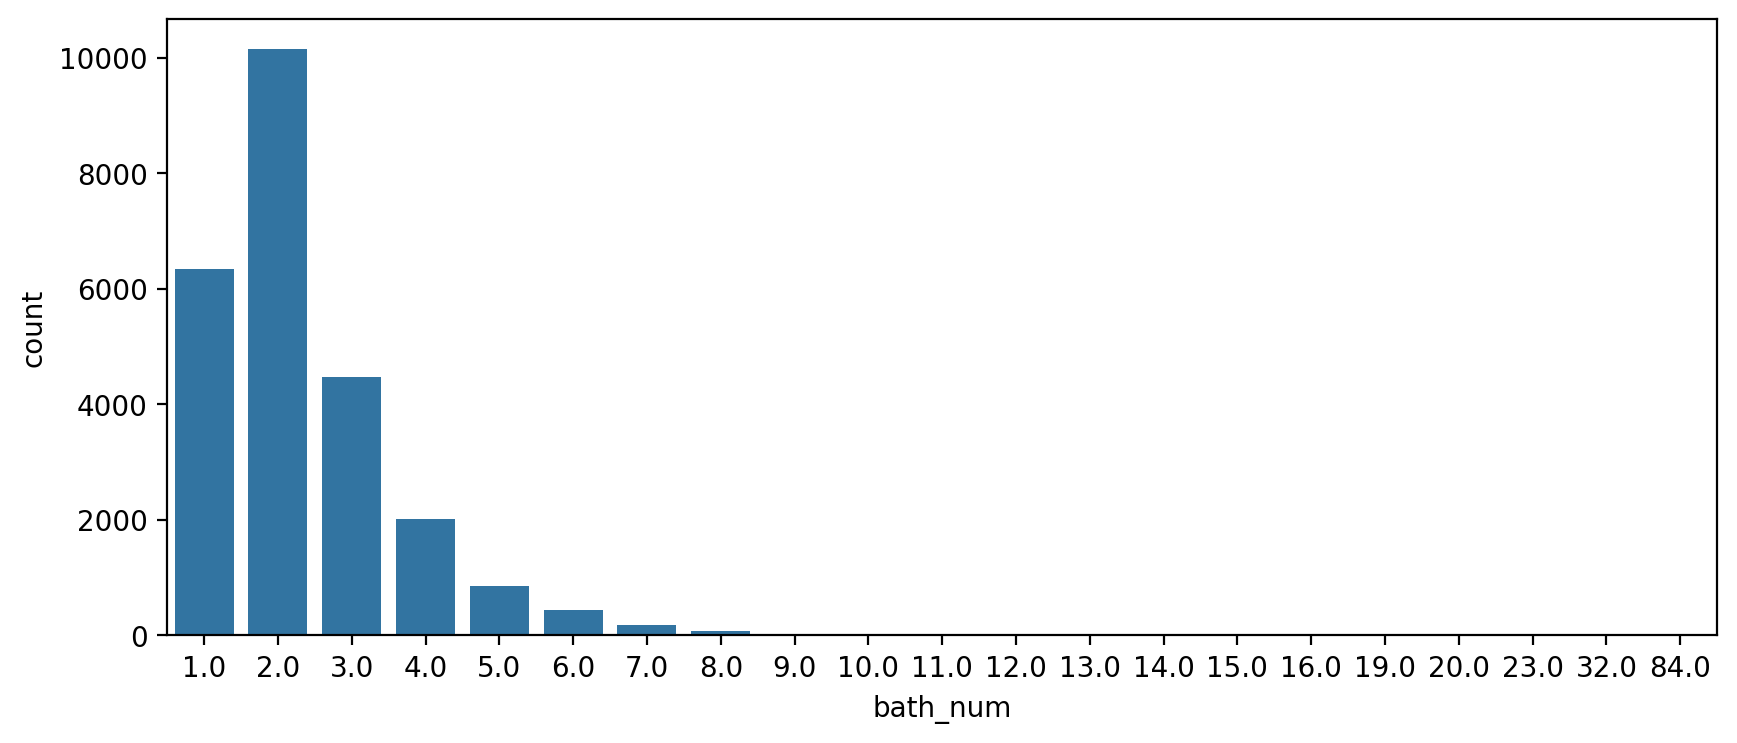

In [32]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='bath_num',data=data);

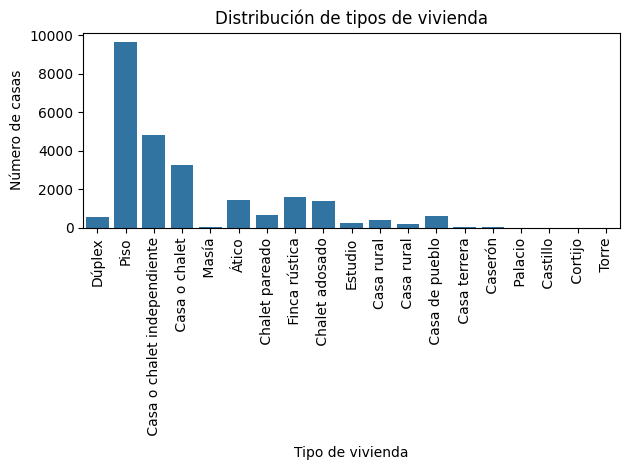

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el barplot
sns.countplot(data=data, x='house_type')

# Rotar las etiquetas del eje x en diagonal
plt.xticks(rotation=90)  # o usa 60 si lo prefieres más inclinado
plt.xlabel('Tipo de vivienda')
plt.ylabel('Número de casas')
plt.title('Distribución de tipos de vivienda')
plt.tight_layout()  # Para que no se corte el gráfico
plt.show()


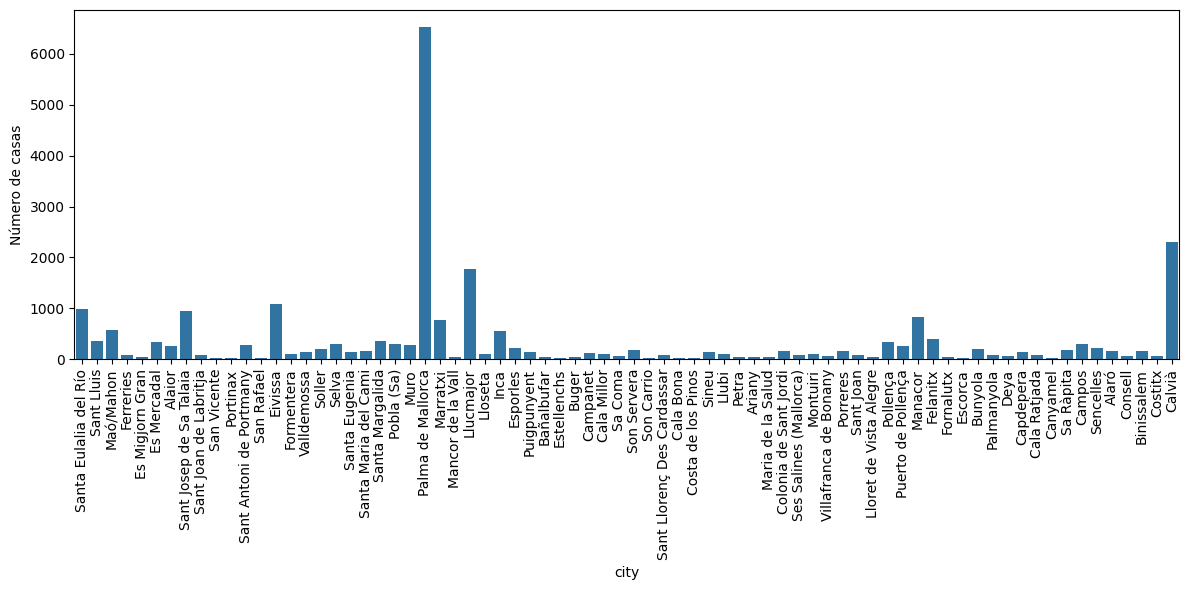

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  # Cambia el tamaño: ancho x alto
# Crear el barplot
sns.countplot(data=data, x='loc_city')

# Rotar las etiquetas del eje x en diagonal
plt.xticks(rotation=90)  # o usa 60 si lo prefieres más inclinado
plt.xlabel('city')
plt.ylabel('Número de casas')
plt.tight_layout()  # Para que no se corte el gráfico
plt.show()


### Change some values for the model.

In [35]:
data['garage'] = data['garage'].apply(
    lambda x: 1 if x == 'plaza de garaje incluida en el precio' else 0
)

data.loc[(data['house_type'] == 'Piso') & (data['lift'] == "1"), 'house_type'] = 'Piso con ascensor'

data = data.drop(columns=['lift'])

#### Check the nulls in data

In [36]:
data.isnull().sum()

air_conditioner       0
balcony               0
bath_num            193
chimney               0
garage                0
garden                0
house_type            0
loc_city              0
m2_real               0
price                 0
reduced_mobility      0
room_num            379
storage_room          0
swimming_pool         0
terrace               0
loc_zone              0
price_range          14
dtype: int64

#### Handle numerical missing data
- We replace missing data with median

In [37]:
data['bath_num'] = data['bath_num'].fillna(data['bath_num'].mode()[0])
data['room_num'] = data['room_num'].fillna(data['room_num'].mode()[0])

In [38]:
data.isnull().sum()

air_conditioner      0
balcony              0
bath_num             0
chimney              0
garage               0
garden               0
house_type           0
loc_city             0
m2_real              0
price                0
reduced_mobility     0
room_num             0
storage_room         0
swimming_pool        0
terrace              0
loc_zone             0
price_range         14
dtype: int64

In [39]:
data.shape

(24822, 17)

## creating a model that fits the data

#### Convert the categorical data into numerical data


In [40]:
dave_data = data
print(data.head())  

   air_conditioner  balcony  bath_num  chimney  garage  garden  \
0              1.0      0.0       2.0      0.0       0     1.0   
1              1.0      0.0       1.0      0.0       0     0.0   
2              0.0      0.0       2.0      0.0       0     0.0   
3              0.0      0.0       1.0      0.0       0     1.0   
4              1.0      1.0       2.0      0.0       0     1.0   

          house_type               loc_city  m2_real     price  \
0             Dúplex  Santa Eulalia del Río    150.0  550000.0   
1  Piso con ascensor  Santa Eulalia del Río     55.0  240000.0   
2  Piso con ascensor  Santa Eulalia del Río    130.0  775000.0   
3               Piso  Santa Eulalia del Río     70.0  300000.0   
4             Dúplex  Santa Eulalia del Río    150.0  485000.0   

   reduced_mobility  room_num  storage_room  swimming_pool  terrace  \
0               0.0       2.0           0.0            1.0      1.0   
1               0.0       1.0           0.0            0.0      

In [41]:
# Label Encode The Target Variable
encode = LabelEncoder()
# data['price'] = encode.fit_transform(data['price'])

# Remove the column 'price_range'
data = data.drop(columns=['price_range'])

In [42]:
# Ordinal Encode The features
enc = OrdinalEncoder() 
data[[
    'air_conditioner', 'balcony', 'bath_num', 'chimney', 
     'garage', 'garden', 'm2_real', 'reduced_mobility', 
    'room_num', 'storage_room', 'swimming_pool', 'terrace']] = enc.fit_transform(data[[
    'air_conditioner', 'balcony', 'bath_num', 'chimney', 
     'garage', 'garden', 'm2_real', 'reduced_mobility', 
    'room_num', 'storage_room', 'swimming_pool', 'terrace']])
data.head()

,air_conditioner,balcony,bath_num,chimney,garage,garden,house_type,loc_city,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,loc_zone
0,1.0,0.0,1.0,0.0,0.0,1.0,Dúplex,Santa Eulalia del Río,140.0,550000.0,0.0,1.0,0.0,1.0,1.0,"Ibiza, Balears (Illes)"
1,1.0,0.0,0.0,0.0,0.0,0.0,Piso con ascensor,Santa Eulalia del Río,45.0,240000.0,0.0,0.0,0.0,0.0,0.0,"Ibiza, Balears (Illes)"
2,0.0,0.0,1.0,0.0,0.0,0.0,Piso con ascensor,Santa Eulalia del Río,120.0,775000.0,0.0,2.0,0.0,0.0,1.0,"Ibiza, Balears (Illes)"
3,0.0,0.0,0.0,0.0,0.0,1.0,Piso,Santa Eulalia del Río,60.0,300000.0,0.0,1.0,0.0,0.0,1.0,"Ibiza, Balears (Illes)"
4,1.0,1.0,1.0,0.0,0.0,1.0,Dúplex,Santa Eulalia del Río,140.0,485000.0,0.0,2.0,0.0,1.0,1.0,"Ibiza, Balears (Illes)"


#### Splitting it into dependence and independence variables (Target and Features)

In [43]:
# y = data['price']
# X = data.drop(columns=['price'])
data_encoded = pd.get_dummies(data, drop_first=True)
# print(data_encoded.head())

for k in data_encoded.keys():
    print(k)


air_conditioner
balcony
bath_num
chimney
garage
garden
m2_real
price
reduced_mobility
room_num
storage_room
swimming_pool
terrace
house_type_ Casa o chalet
house_type_ Casa o chalet independiente
house_type_ Casa rural
house_type_ Casa terrera
house_type_ Caserón
house_type_ Castillo
house_type_ Chalet adosado
house_type_ Chalet pareado
house_type_ Cortijo
house_type_ Finca rústica
house_type_ Masía
house_type_ Palacio
house_type_ Torre
house_type_Casa rural
house_type_Dúplex
house_type_Estudio
house_type_Piso
house_type_Piso con ascensor
house_type_Ático
loc_city_Alaró
loc_city_Ariany
loc_city_Bañalbufar
loc_city_Binissalem
loc_city_Buger
loc_city_Bunyola
loc_city_Cala Bona
loc_city_Cala Millor
loc_city_Cala Ratjada
loc_city_Calvià
loc_city_Campanet
loc_city_Campos
loc_city_Canyamel
loc_city_Capdepera
loc_city_Colonia de Sant Jordi
loc_city_Consell
loc_city_Costa de los Pinos
loc_city_Costitx
loc_city_Deya
loc_city_Eivissa
loc_city_Es Mercadal
loc_city_Es Migjorn Gran
loc_city_Escorca

In [44]:
x=data_encoded.drop(columns=['price'])
y=data_encoded['price']

#### Splitting the data into training data and testing data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [46]:
print(x_train.shape)

print(x_train)

(17375, 107)
       air_conditioner  balcony  bath_num  chimney  garage  garden  m2_real  \
3593               0.0      0.0       1.0      0.0     0.0     0.0   2553.0   
15067              1.0      0.0       1.0      0.0     0.0     1.0    290.0   
8479               1.0      1.0       2.0      0.0     0.0     1.0   1979.0   
13558              1.0      1.0       0.0      0.0     0.0     1.0     71.0   
19881              0.0      0.0       1.0      0.0     0.0     0.0     48.0   
...                ...      ...       ...      ...     ...     ...      ...   
13152              0.0      0.0       1.0      0.0     0.0     0.0    110.0   
19690              0.0      0.0       1.0      0.0     0.0     0.0     88.0   
9869               0.0      0.0       1.0      0.0     0.0     0.0     74.0   
10824              0.0      0.0       3.0      0.0     0.0     0.0    301.0   
2738               1.0      1.0       1.0      0.0     0.0     1.0     76.0   

       reduced_mobility  room_num  sto

In [47]:
print(x_test.shape)

(7447, 107)


### Data Scaling


In [48]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Recuperam els noms
original_columns = x.columns.tolist()
x_train = pd.DataFrame(x_train, columns=original_columns)
x_test = pd.DataFrame(x_test, columns=original_columns)

print(x_train.head())

   air_conditioner   balcony  bath_num   chimney  garage    garden   m2_real  \
0        -1.065631 -0.559646 -0.248723 -0.274321     0.0 -0.818554  2.933858   
1         0.938411 -0.559646 -0.248723 -0.274321     0.0  1.221666 -0.349063   
2         0.938411  1.786843  0.478568 -0.274321     0.0  1.221666  2.101159   
3         0.938411  1.786843 -0.976015 -0.274321     0.0  1.221666 -0.666765   
4        -1.065631 -0.559646 -0.248723 -0.274321     0.0 -0.818554 -0.700130   

   reduced_mobility  room_num  storage_room  ...  \
0         -0.241165 -0.264188     -0.781018  ...   
1         -0.241165 -0.896108     -0.781018  ...   
2         -0.241165  0.367732      1.280380  ...   
3          4.146531 -1.528029      1.280380  ...   
4         -0.241165 -1.528029      1.280380  ...   

   loc_city_Ses Salines (Mallorca)  loc_city_Sineu  loc_city_Soller  \
0                        -0.055835       -0.072158        -0.087828   
1                        -0.055835       -0.072158        -0.087

# Logistic Regression Model


In [49]:

import xgboost
import shap

# train an XGBoost model
model = xgboost.XGBRegressor().fit(x_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)

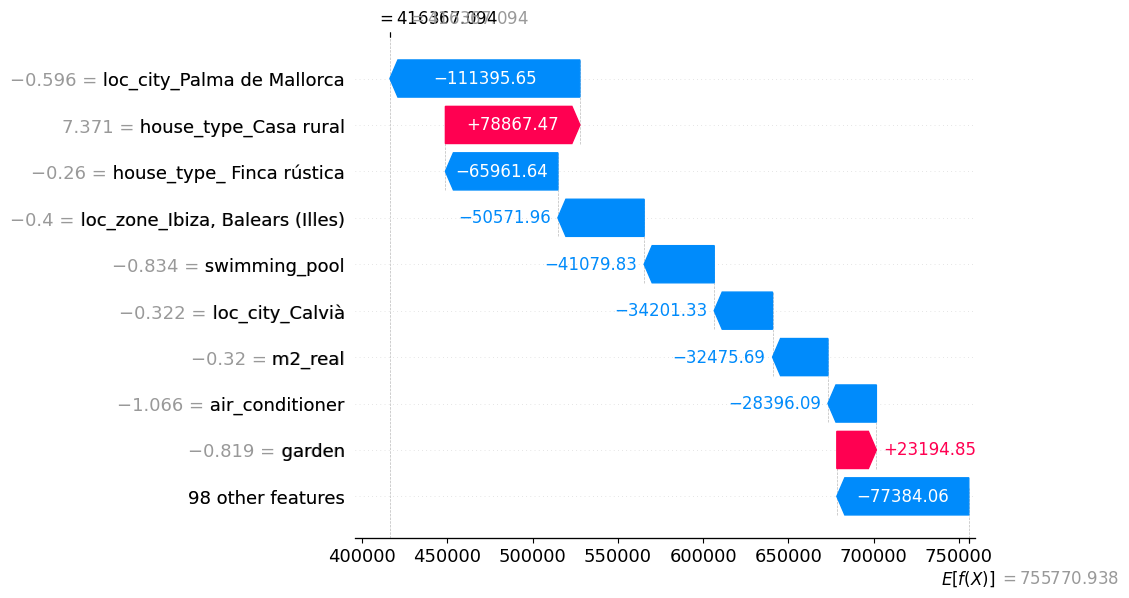

Predicció del model: 1040320.62
Valor real: 850000.00


In [ ]:
shap_values = explainer(x_test)

shap.plots.waterfall(shap_values[0])

index = 400
prediccio = model.predict(x_test.iloc[[index]])
print(f"Predicció del model: {prediccio[0]:.2f}")

print(f"Valor real: {y_test.iloc[index]:.2f}")

In [ ]:
import joblib
# Save the model and scaler
joblib.dump(model, 'xgb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(original_columns, 'columns.pkl')


['columns.pkl']

In [ ]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.08    

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test,predict))

print(f'R²: {r2:.3f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R²: 0.553
MAE: 257.13
RMSE: 349.95


# Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

predict = model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test,predict))

print(f'R²: {r2:.3f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R²: 0.783
MAE: 178.03
RMSE: 243.75
